Cox-Ross-Rubinstein (CRR) binomial model for option pricing. This model is used to estimate the price of options by simulating different paths the underlying asset's price can take until the option's expiration

In [7]:
import time
import timeit
from enum import Enum
import math
import matplotlib.pyplot as plt
import numpy as np

# one step binomial
from enum import Enum
import math

class PayoffType(str, Enum):
    Call = 'Call'
    Put = 'Put'

def crrBinomial(S, r, vol, payoffType, K, T, n):
    t = T / n
    b = math.exp(vol * vol * t+r*t) + math.exp(-r * t)
    u = (b + math.sqrt(b*b - 4)) / 2
    p = (math.exp(r * t) - (1/u)) / (u - 1/u)
    # set up the last time slice, there are n+1 nodes at the last time slice
    
    # a dictionary that maps a lambda function
    payoffDict = {
        PayoffType.Call: lambda s: max(s-K, 0),
        PayoffType.Put: lambda s: max(K-s, 0),
    }
    
    # initialise option value at final time step
    vs = [payoffDict[payoffType]( S * u**(n-i-i)) for i in range(n+1)]
    
    # iterate backward
    for i in range(n-1, -1, -1):
        # calculate the value of each node at time slide i, there are i nodes
        for j in range(i+1):
            vs[j] = math.exp(-r * t) * (vs[j] * p + vs[j+1] * (1-p))
    return vs[0] # value of call option at time 0
# test ---
S, r, vol, K, T = 100, 0.01, 0.2, 105, 1.0

crrBinomial(S, r, vol, PayoffType.Call, K, T, 300)

6.296057152109465

### If underlying price always increase for every timestep, call option price is maximised at 3090.312582671582

vs =  [3090.312582671582, 3017.362055904912, 2946.07702483478, 2876.4194653914765, 2808.3522216131337, 2741.8389858264077, 2676.844279279642, 2613.333433218183, 2551.272570391762, 2490.6285869840667, 2431.36913495487, 2373.4626047852994, 2316.8781086170366, 2261.585463776462, 2207.555176674944, 2154.758427076701, 2103.167052725827, 2052.753534324297, 2003.490980852927, 1955.353115227464, 1908.3142602821604, 1862.3493250733384, 1817.4337914956636, 1773.5437012039652, 1730.6556428336444, 1688.7467395128426, 1647.7946366597148, 1607.777490058298, 1568.6739542066105, 1530.4631709307703, 1493.1247582590638, 1456.638799550016, 1420.98583286868, 1386.1468406054657, 1352.1032393319797, 1318.836869888457, 1286.3299876975057, 1254.56525329899, 1223.5257231010091, 1193.194840342034, 1163.5564262593832, 1134.5946714593276, 1106.2941274842192, 1078.6396985721449, 1051.616633604715, 1025.2105182386838, 999.4072672172115, 974.193116856663, 949.5546177049355, 925.4786273674022, 901.9523034966419, 878.9630969422163, 856.4987450568419, 834.5472651553847, 813.0969481231889, 792.1363521703321, 771.6542967284712, 751.6398564870298, 732.0823555655379, 712.9713618190249, 694.2966812734185, 676.0483526879894, 658.2166422419366, 640.7920383422809, 623.7652465502961, 607.1271846237736, 590.8689776724727, 574.981953424176, 559.4576375988215, 544.2877493882467, 529.4641970391316, 514.9790735367859, 500.8246523874766, 486.99338349704783, 473.477889143633, 460.27096004231294, 447.36555149961873, 434.7547796558298, 422.43191781306166, 410.39039284718547, 398.6237817016657, 387.12580796144357, 375.8903385050425, 364.911380233106, 354.18307687162496, 343.6997058481497, 333.45567523931805, 323.4455207880746, 313.66390298898654, 304.1056042401045, 294.7655260598472, 285.6386863674257, 276.7202168253575, 268.005360242652, 259.48946803728217, 251.16799775659007, 243.03651065430176, 235.09066932286083, 227.3262353798164, 219.73906720703246, 212.32511774151158, 205.08043231665584, 198.00114655281243, 191.0834842959788, 184.3237556035691, 177.7183547761656, 171.26375843420658, 164.95652363858443, 158.79328605415128, 152.77075815515258, 146.88572747163178, 141.13505487587025, 135.51567290794856, 130.0245841395361, 124.65885957503613, 119.41563708923354, 114.29211990061171, 109.28557507952442, 104.39333209042692, 99.61278136738832, 94.94137292212613, 90.37661498381976, 85.91607266997772, 81.55736668764968, 77.29817206429044, 73.13621690759899, 69.06928119367083, 65.09519558281744, 61.21184026242133, 57.417143816209034, 53.709082119339286, 50.08567725871677, 46.54499647795572, 43.08515114643052, 39.704295751863185, 36.40062691591086, 33.172382432227636, 30.01784032648814, 26.935317937870906, 23.92317102151239, 20.979792871451906, 18.103613463600553, 15.293098618276176, 12.546749181858544, 9.86310022712729, 7.240720271856745, 4.678210515250555, 2.1742040918090026, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

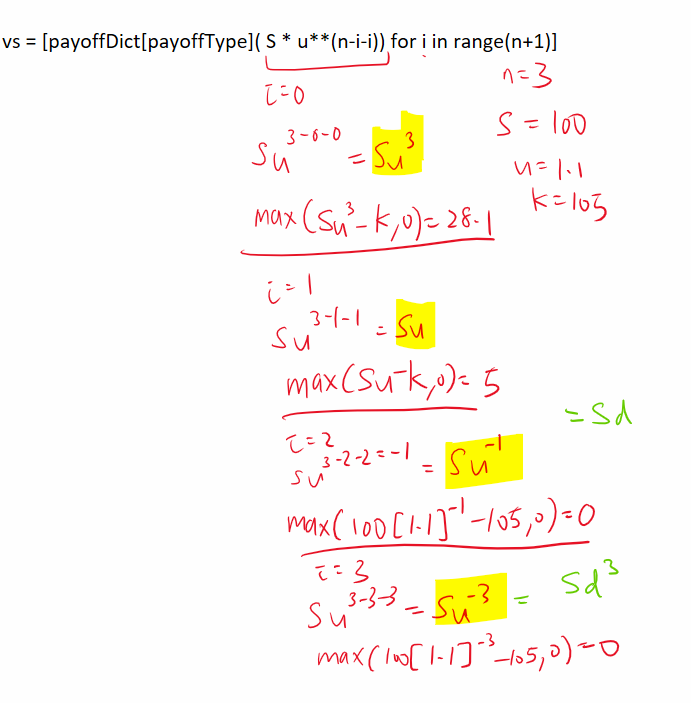
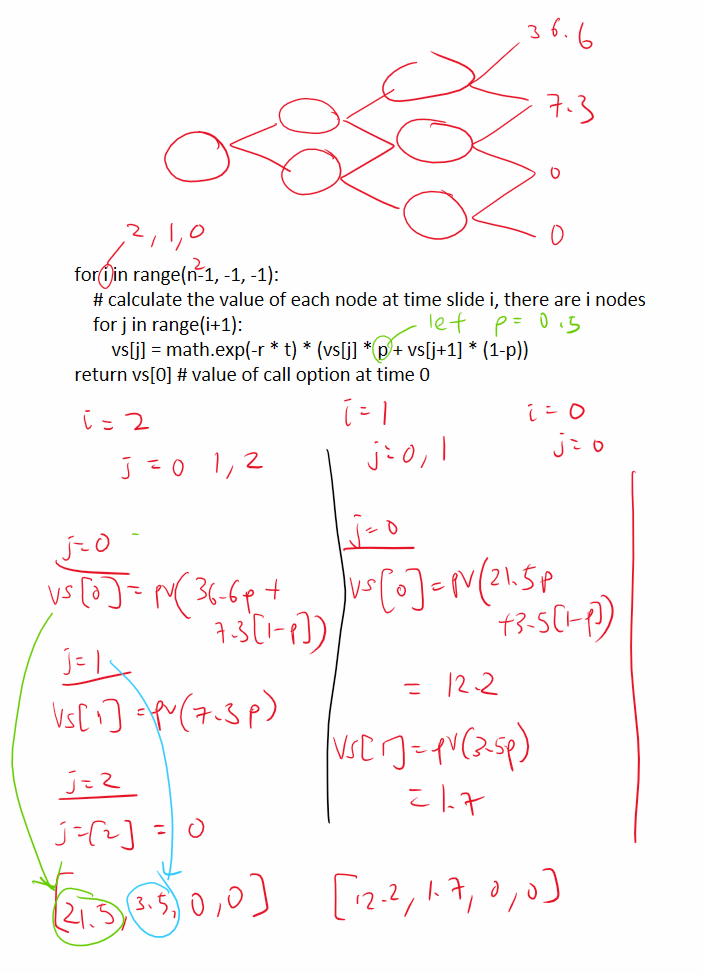